In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("heart_cleveland_upload.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


<Axes: >

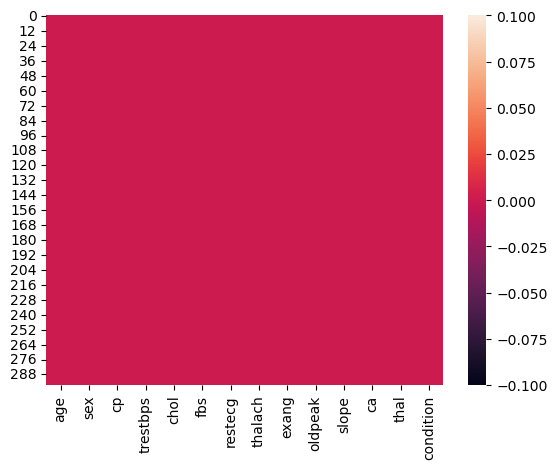

In [12]:
sns.heatmap(dataset.isnull())

<Axes: >

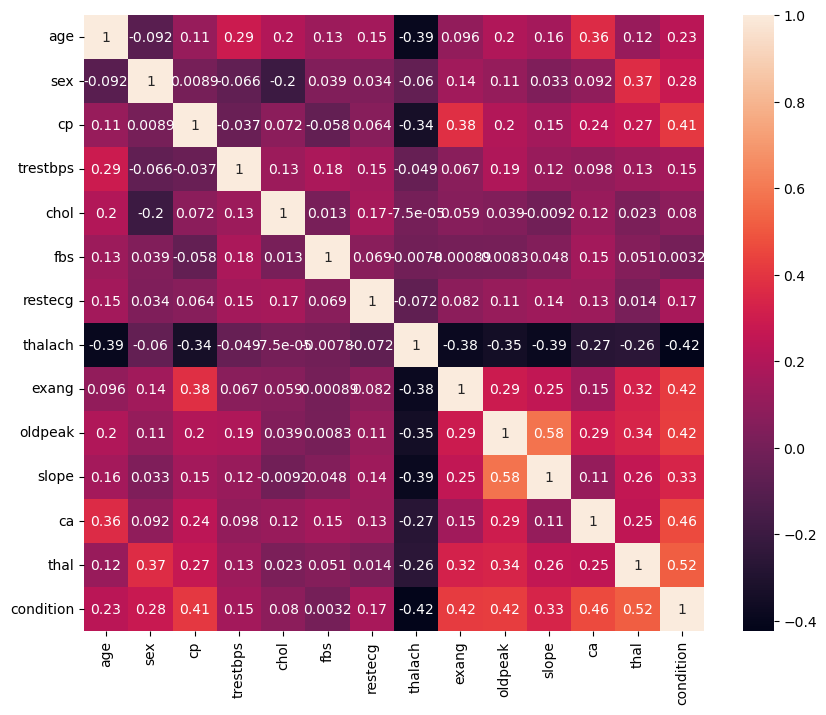

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)

C:\Users\user\AppData\Local\Temp\ipykernel_460\4231264623.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['trestbps'])


<Axes: xlabel='trestbps', ylabel='Density'>

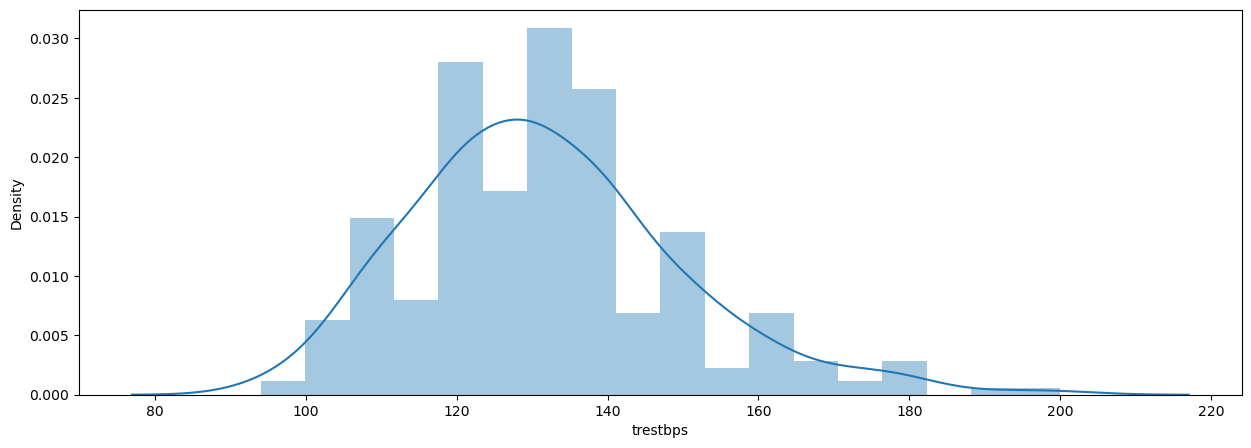

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(dataset['trestbps'])

C:\Users\user\AppData\Local\Temp\ipykernel_460\1992786968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['chol'])


<Axes: xlabel='chol', ylabel='Density'>

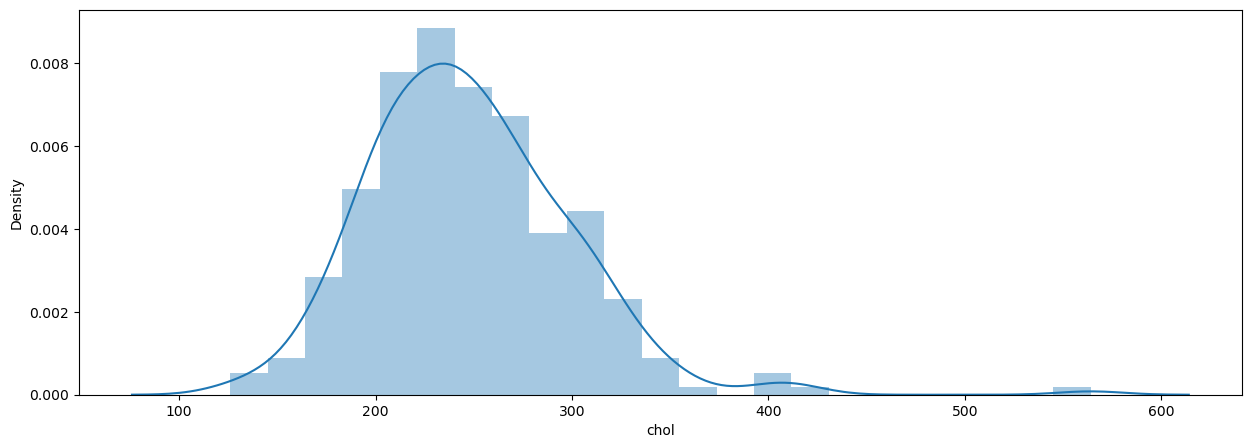

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(dataset['chol'])

In [21]:
models = dataset.groupby('thalach').count()[['age']].sort_values(by='age',ascending=True).reset_index()
models = models.rename(columns={'age':'age'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

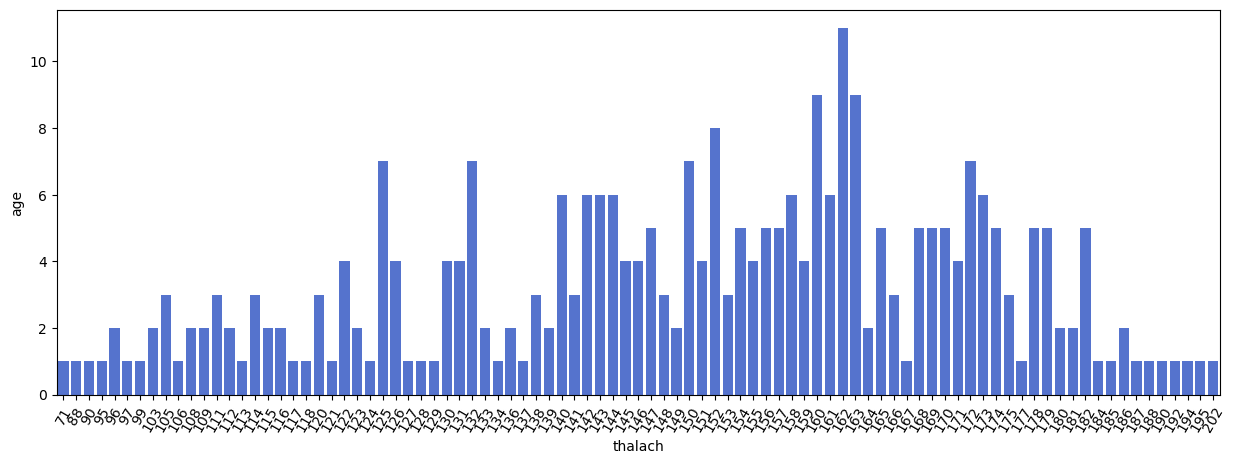

In [23]:
fig= plt.figure(figsize=(15,5))
sns.barplot(x=models['thalach'], y=models['age'], color='royalblue')
plt.xticks(rotation=60)

In [5]:
x = dataset.drop(columns='condition', axis=1)
y = dataset['condition']

In [6]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [7]:
print(y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [9]:
print(x.shape, x_train.shape, x_test.shape)

(297, 13) (237, 13) (60, 13)


In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\user\anaconda.3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [15]:
print('Akurasi data training dengan model logistic regression adalah =',training_data_accuracy)

Akurasi data training dengan model logistic regression adalah = 0.8565400843881856


In [16]:
x_test_predict = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_predict, y_test)

In [17]:
print('Akurasi data testing menggunakan model logistic regression adalah =', testing_data_accuracy)

Akurasi data testing menggunakan model logistic regression adalah = 0.9


In [18]:
input_data =(61, 1, 0, 134, 234, 0, 0, 145, 0, 2.6, 1, 2, 0)
dataasarray = np.asarray(input_data)
reshape = dataasarray.reshape(1, -1)
prediction = model.predict(reshape)
print(prediction)

if(prediction[0]==0):
    print('Pasien Tidak Terkena Penyakit Jantung')
else:
    print('Pasien Terkena Penyakit Jantung')

[1]
Pasien Terkena Penyakit Jantung


c:\Users\user\anaconda.3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
import pickle
filename = 'penyakitjantung.sav'
pickle.dump(model, open(filename, 'wb'))